In [2]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tables import *
from sklearn.decomposition import FastICA, PCA


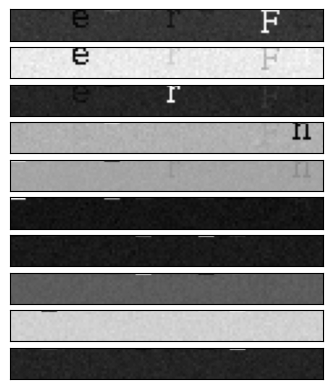

In [37]:

datafilename='A_challenge_for_Mona.hdf5'

# Read ICA dataset
ImagesFile = open_file(datafilename, mode = "r")
ImagesTable=ImagesFile.root.Images.Images

# Get image dimensions from the first image
first_image = ImagesTable[0]['image']
image_height, image_width = first_image.shape
noofpixels = image_height * image_width
image_shape = (image_height, image_width)
noofcomponents = 10

# Data reading and ICA analysis
dataset = np.zeros((ImagesTable.nrows, noofpixels))

for i, x in enumerate(ImagesTable.iterrows(0, ImagesTable.nrows)):
    if x['image'].shape == image_shape:
        dataset[i] = x['image'].flatten()
    else:
        dataset[i] = x['image'].reshape(image_shape).flatten()


# Perform PCA analysis
pca = PCA(n_components=noofcomponents)
pca_result = pca.fit(dataset)

for i in range(noofcomponents):
    # plt.subplot(2, 5, i+1)
    plt.subplot(noofcomponents, 1, i + 1)
    plt.imshow(pca_result.components_[i].reshape(image_shape), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show()

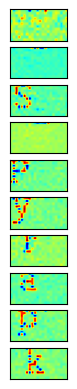

In [39]:
datafilename='B_challenge_for_Mona.hdf5'

# Read ICA dataset
ImagesFile = open_file(datafilename, mode = "r")
ImagesTable=ImagesFile.root.Images.Images

# Get image dimensions from the first image
first_image = ImagesTable[0]['image']
image_height, image_width = first_image.shape
noofpixels = image_height * image_width
image_shape = (image_height, image_width)
noofcomponents = 10

# Data reading and ICA analysis
dataset = np.zeros((ImagesTable.nrows, noofpixels))

for i, x in enumerate(ImagesTable.iterrows(0, ImagesTable.nrows)):
    if x['image'].shape == image_shape:
        dataset[i] = x['image'].flatten()
    else:
        dataset[i] = x['image'].reshape(image_shape).flatten()



# Perform ICA analysis
ica = FastICA(n_components=noofcomponents)
# ica = FastICA(n_components=noofcomponents, algorithm='deflation', whiten='arbitrary-variance')

ica_result = ica.fit(dataset)

for i in range(noofcomponents):
    plt.subplot(noofcomponents, 1, i + 1)
    plt.imshow(ica_result.components_[i].reshape(image_shape), cmap=plt.cm.jet)
    plt.xticks(())
    plt.yticks(())
plt.show()


The result of challenge A is: "Fern"

Some other results for this challenge are: "Ember Lumen", "Bernie Lumen", and "Lake Ripple"

So we can understand that the main topic is "Elemental" animation and these words are the characters of this animation

The result of challenge B is: "PySpark "

Some other results for this challenge are: "Sklearn", "Keras", "NLTK", and "Tensorflow"

So we can understand that the main topic is "Python libraries" and these words are some different types of Python libraries. 

When we are using ICA, the order of the components in the output may not necessarily be in a visually meaningful way. Independent Component Analysis (ICA) does not guarantee a specific ordering of components, and the order of components obtained can vary from run to run. The components are extracted based on statistical independence, not on any specific spatial or frequency ordering.
In challenge B, PCA is not showing clear patterns or structure, it might be because the dominant variations in this data are not well-captured by a linear combination of the original features, which is what PCA assumes.